In [1]:
""" Notebook looking at the merged sleep_position/o2 data """

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set(style="ticks")
sns.set_context(context="talk")

In [5]:
df = pd.read_csv("/Users/kmcmanus/Documents/classes/digitalhealth_project/data/formatted_data/20200526_sleep_pos_5S_cleaned.csv",
                index_col='datetime', parse_dates=True, infer_datetime_format=True)
df["sleep_night"] = pd.to_datetime(df["sleep_night"])
print("Total # rows: {}".format(df.shape[0]))
df.head()

Total # rows: 100827


,Orientation,Inclination,sleep_night,SpO2(%),Pulse Rate(bpm),Motion,Vibration,orient_bin,low_oxygen,hour,complete_hour,complete_night
datetime,,,,,,,,,,,,
2020-04-21 20:58:55,-82.30,68.07,2020-04-21,96.0,66.0,0.0,0.0,1,0,20,0,1
2020-04-21 20:59:00,-81.72,68.09,2020-04-21,96.0,65.0,1.0,0.0,1,0,20,0,1
2020-04-21 20:59:05,-82.20,68.04,2020-04-21,96.0,64.0,1.0,0.0,1,0,20,0,1
2020-04-21 20:59:10,-76.71,71.69,2020-04-21,96.0,64.0,21.0,0.0,1,0,20,0,1
2020-04-21 20:59:15,-80.81,69.74,2020-04-21,96.0,64.0,18.0,0.0,1,0,20,0,1


In [6]:
df.describe()

,Orientation,Inclination,SpO2(%),Pulse Rate(bpm),Motion,Vibration,orient_bin,low_oxygen,hour,complete_hour,complete_night
count,100827.000000,100827.000000,100827.000000,100827.000000,100827.000000,100827.000000,100827.000000,100827.000000,100827.000000,100827.000000,100827.000000
mean,-15.725180,92.354492,95.846916,61.313497,1.180706,0.049511,0.138663,0.002638,9.874032,0.806927,0.862765
std,73.536082,17.457866,1.706815,4.603452,7.462625,2.516935,0.829362,0.051296,9.500689,0.394712,0.344097
min,-179.630000,46.460000,79.000000,47.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,-79.740000,76.740000,95.000000,58.000000,0.000000,0.000000,-1.000000,0.000000,2.000000,1.000000,1.000000
50%,-14.530000,95.150000,96.000000,61.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000
75%,65.350000,106.130000,97.000000,64.000000,0.000000,0.000000,1.000000,0.000000,21.000000,1.000000,1.000000
max,179.510000,178.910000,99.000000,93.000000,147.000000,128.000000,1.000000,1.000000,23.000000,1.000000,1.000000


In [8]:
# How many days I have measurements for both sleep position and O2
dates = np.unique(df["sleep_night"])
dates = [pd.Timestamp(date) for date in dates]
print("Number of dates: {}".format(len(dates)))

Number of dates: 23


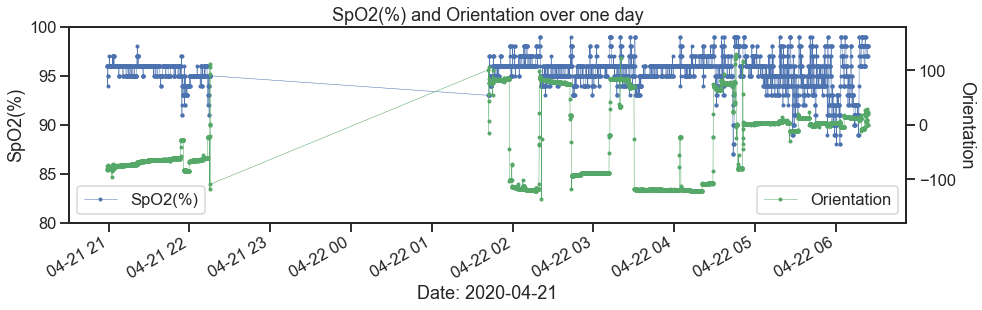

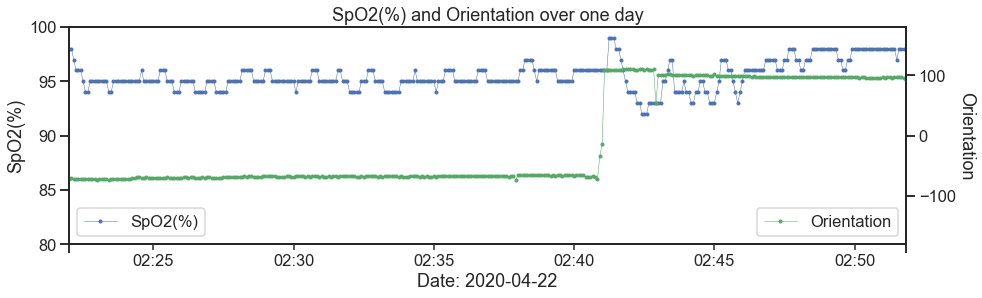

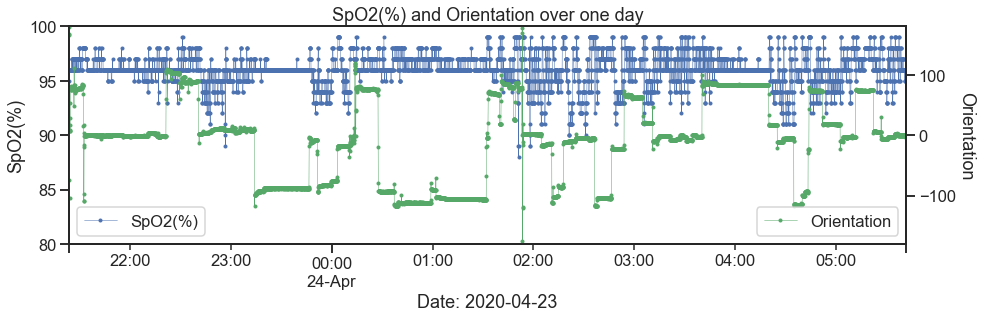

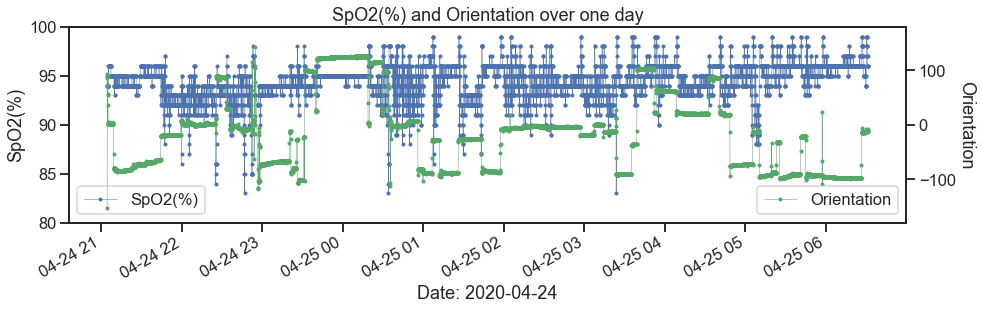

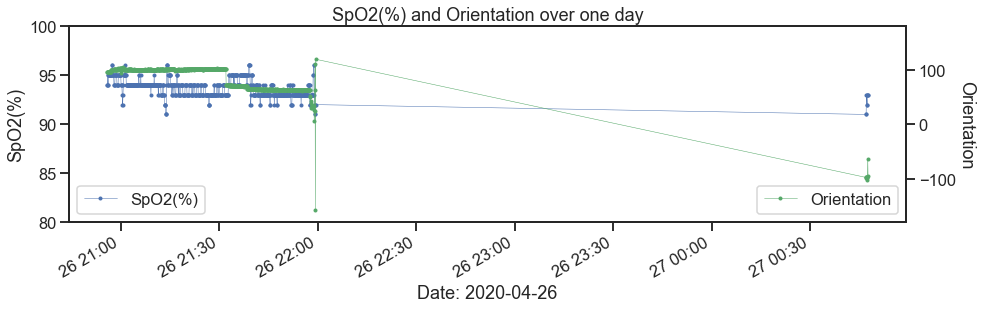

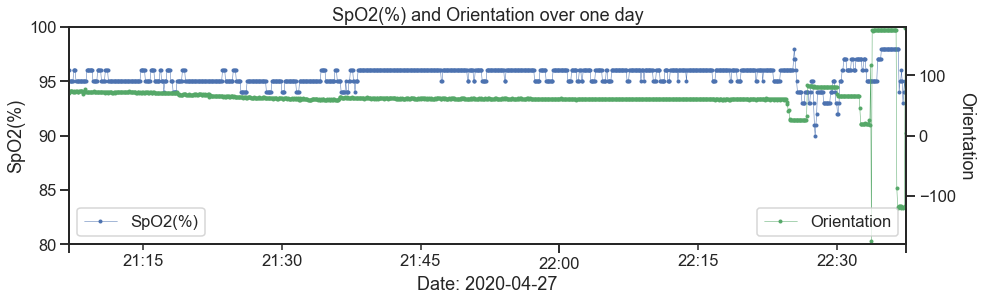

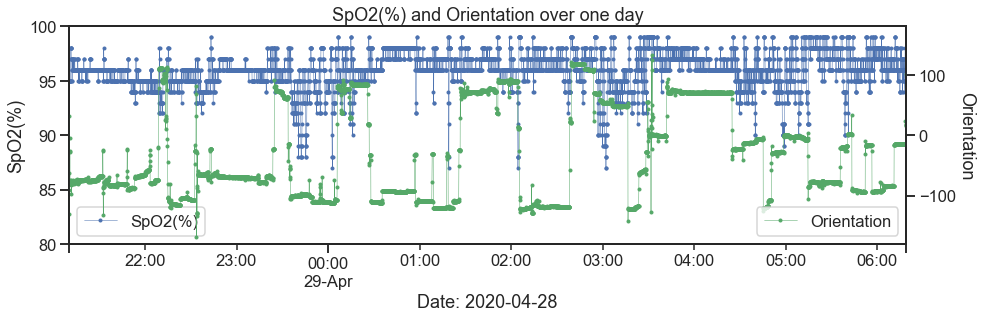

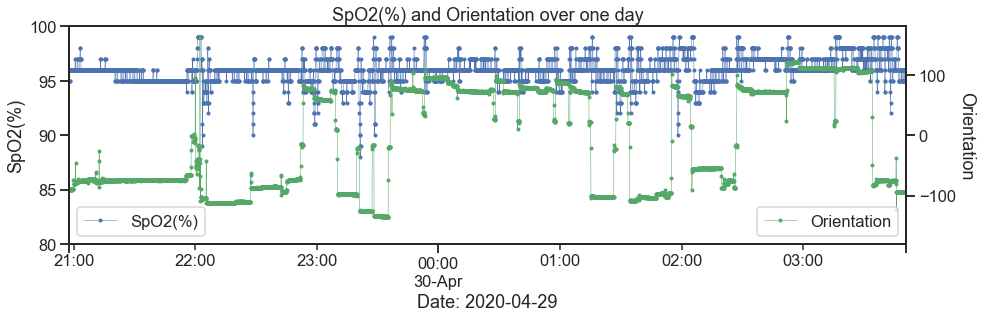

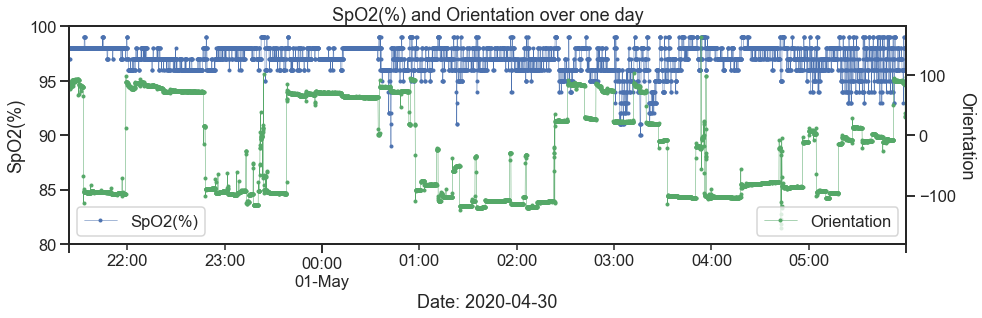

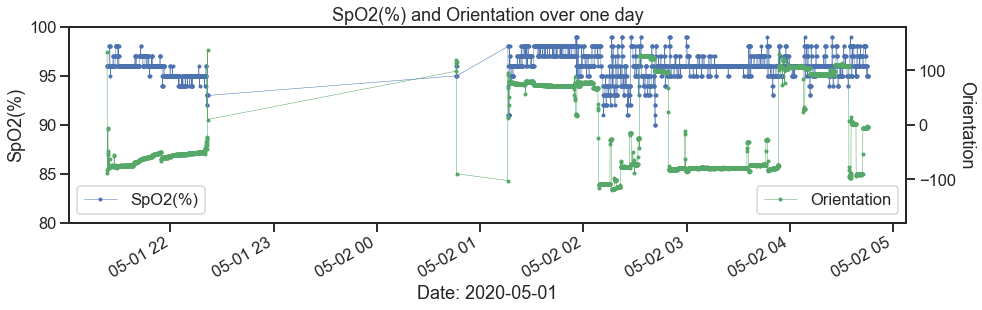

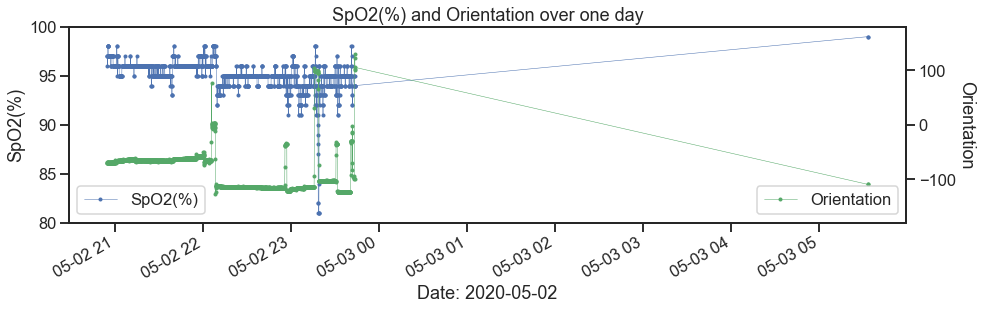

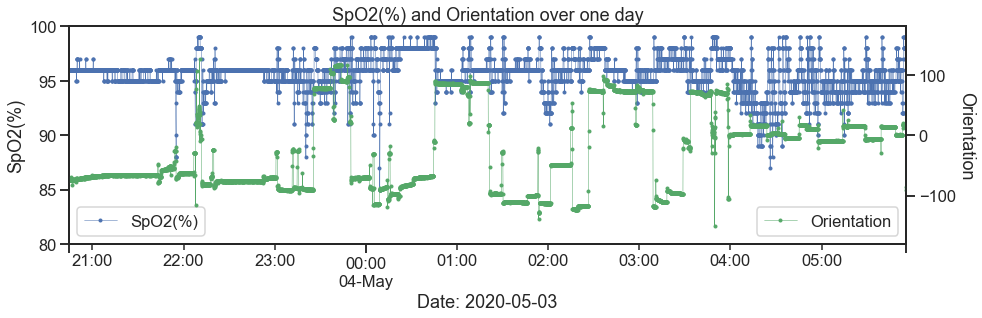

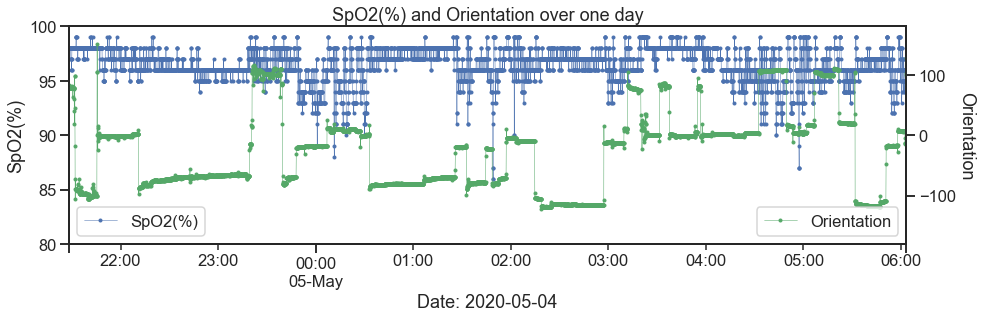

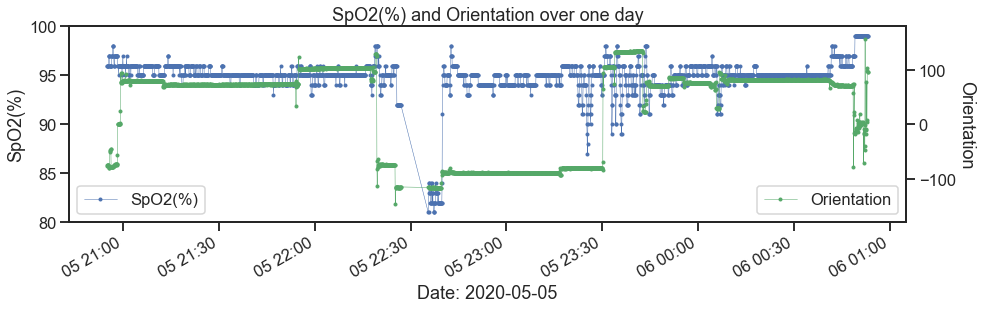

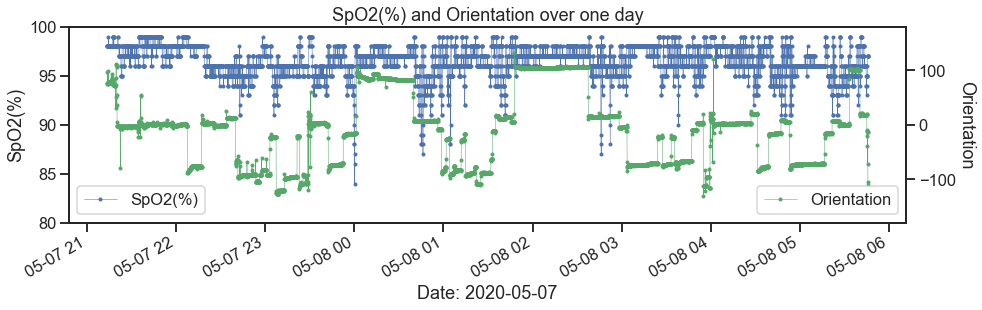

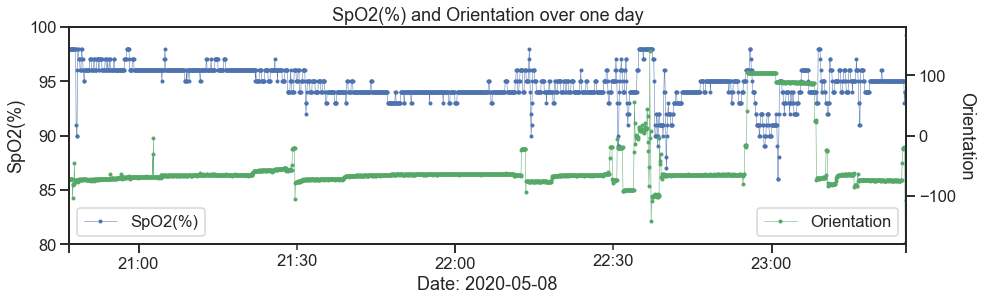

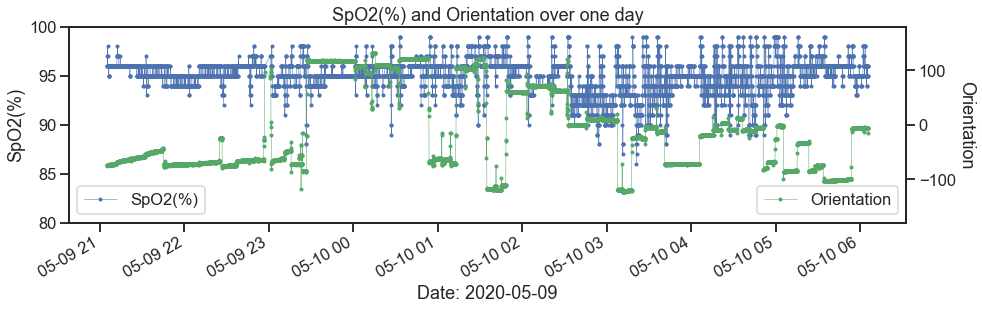

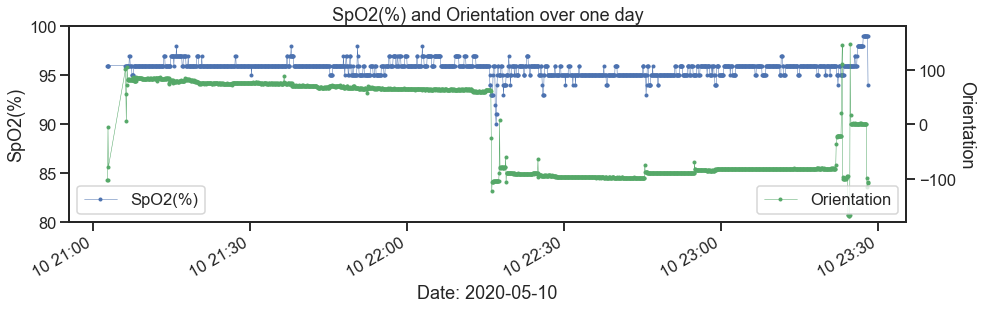

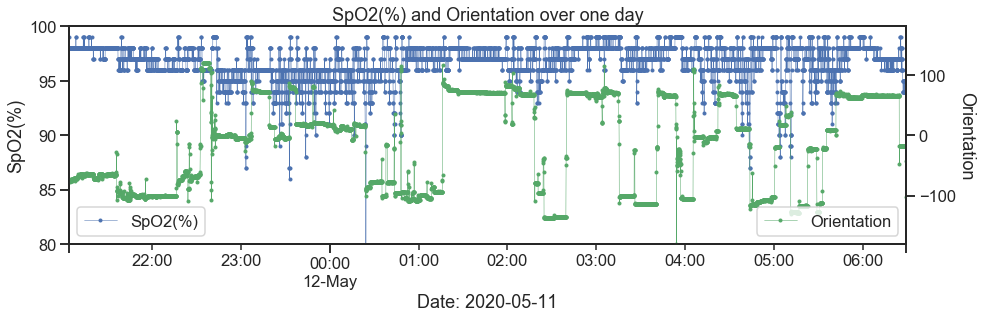

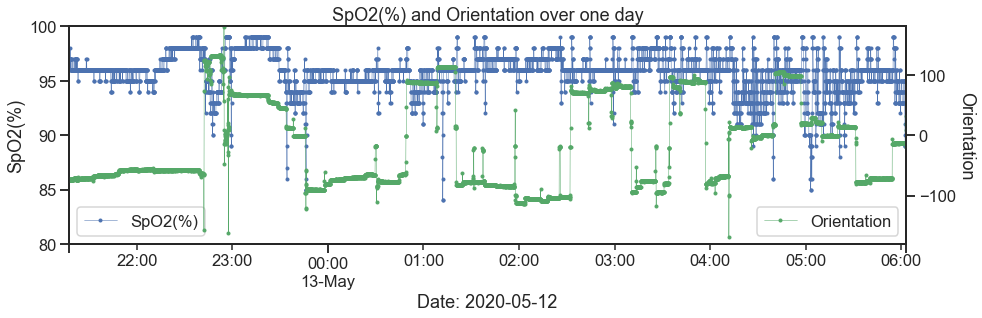

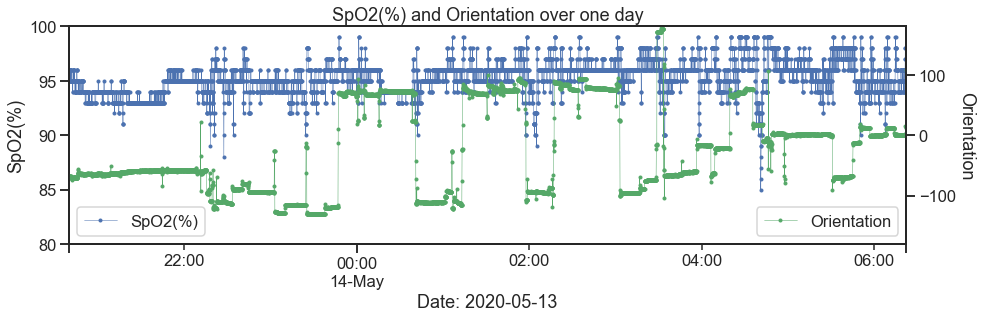

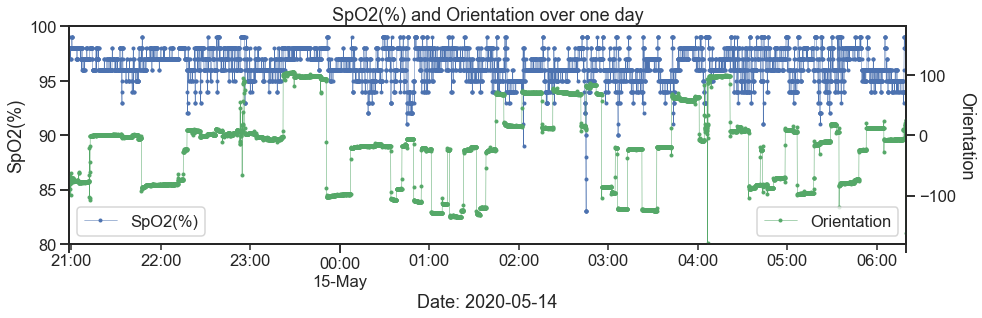

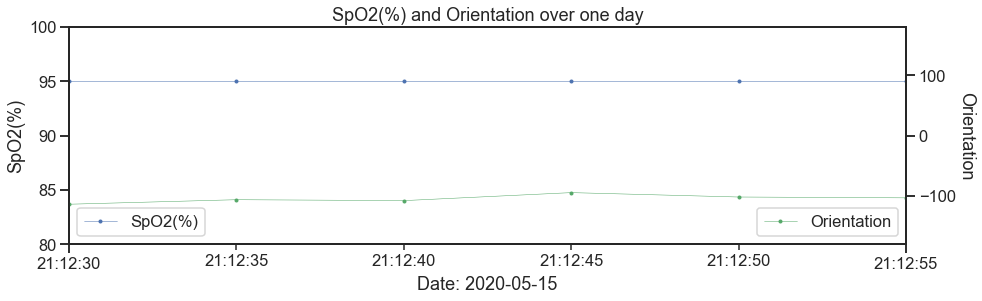

In [10]:
# Plot orientation and spo2 on same graph
for date in dates:
    date_df = df[(df["sleep_night"] == pd.Timestamp(date))]
    if date_df.shape[0] == 0:
        continue
    date_df['date_i_guess'] = date_df.index
    ax = date_df.plot("date_i_guess", "SpO2(%)", legend=False, linewidth=0.5, figsize=(15, 4),
                      markersize=3, marker="o", markerfacecolor="b")
    ax.legend(loc="lower left")
    ax2 = ax.twinx()
    date_df.plot(x="date_i_guess", y="Orientation", ax=ax2, linewidth=0.5, legend=False,
                 color="g", markersize=3, marker="o", markerfacecolor="g")
    ax.set(ylim=(80, 100))
    plt.title("SpO2(%) and Orientation over one day")
    ax.set_ylabel("SpO2(%)")
    ax2.set_ylabel("Orientation", rotation=270, labelpad=20)
    ax2.set(ylim=(-180, 180))
    ax.set_xlabel("Date: {}".format(date.date()))
    ax2.legend(loc="lower right")

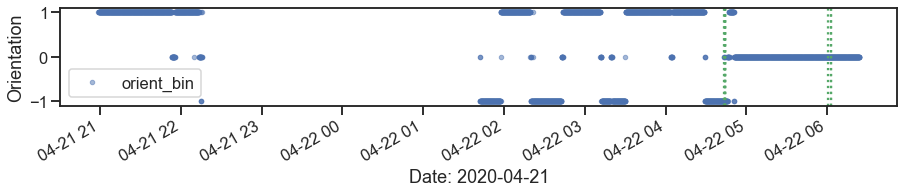

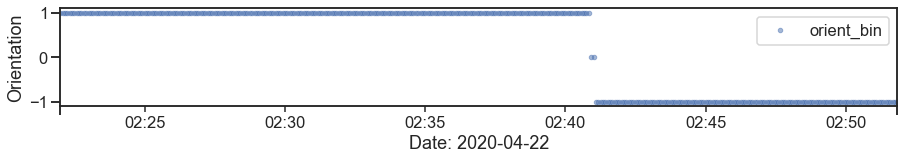

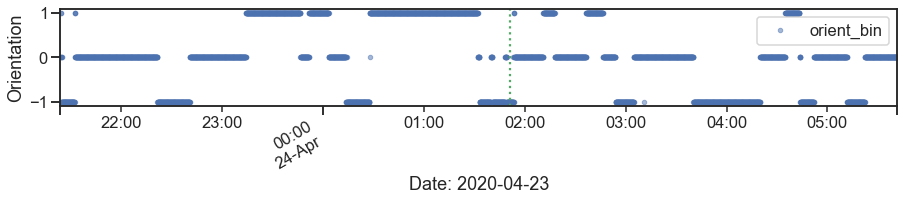

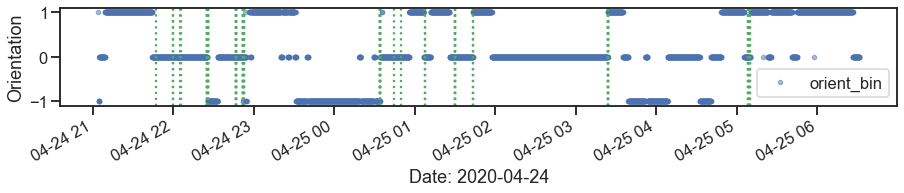

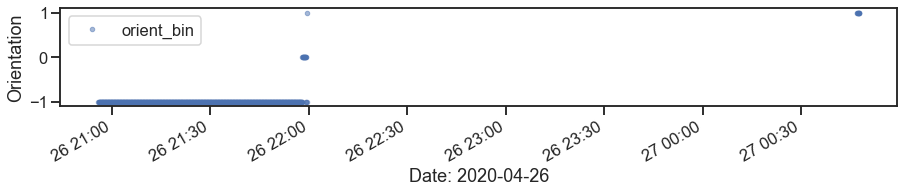

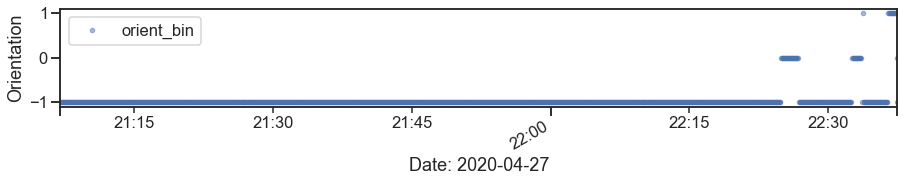

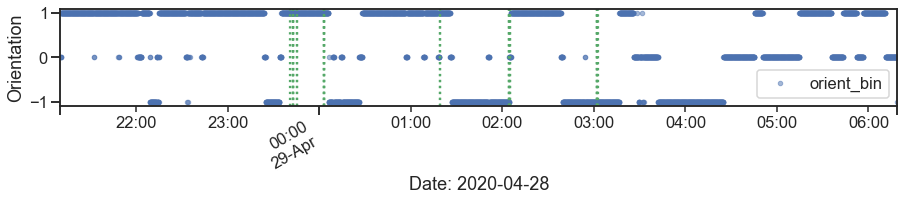

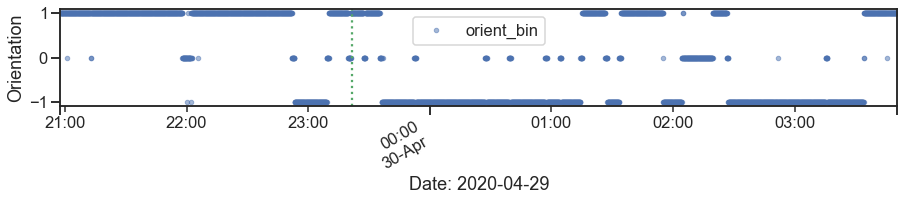

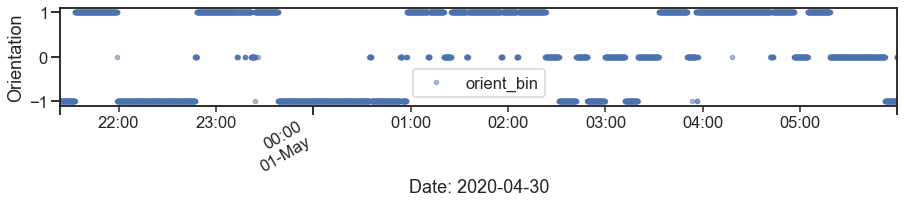

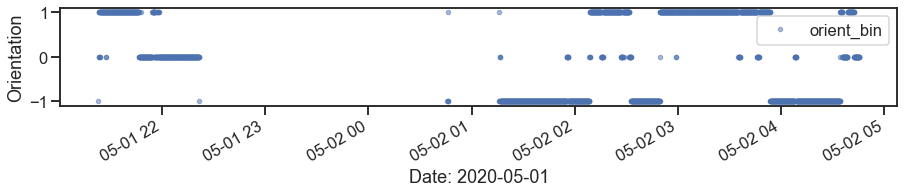

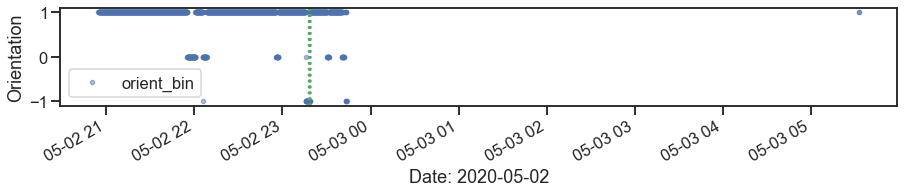

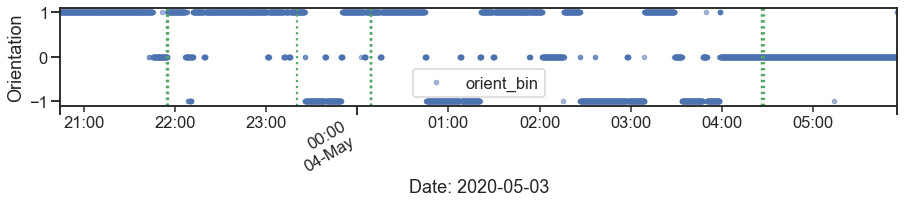

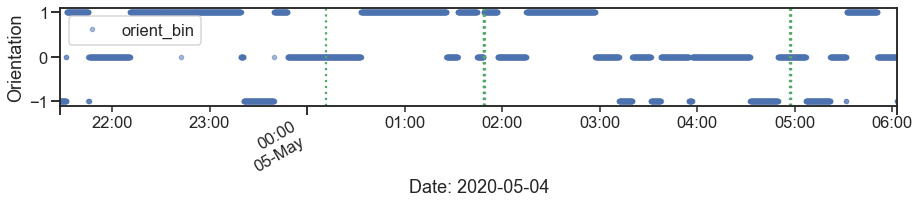

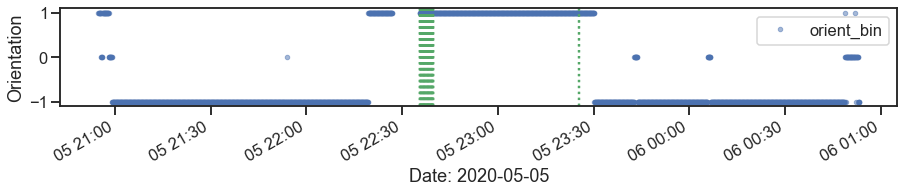

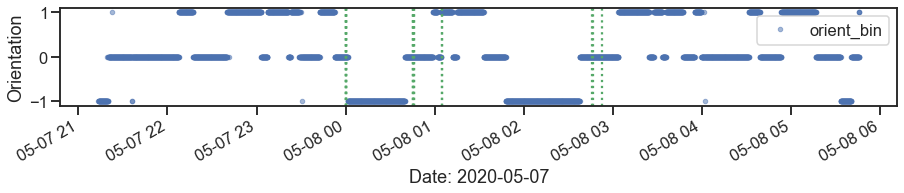

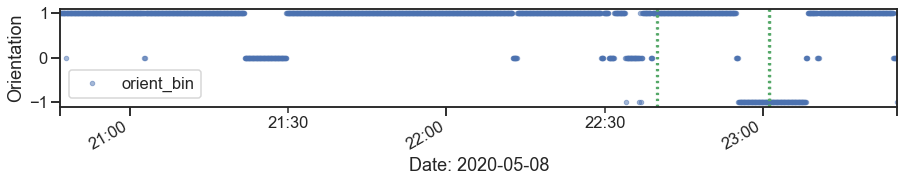

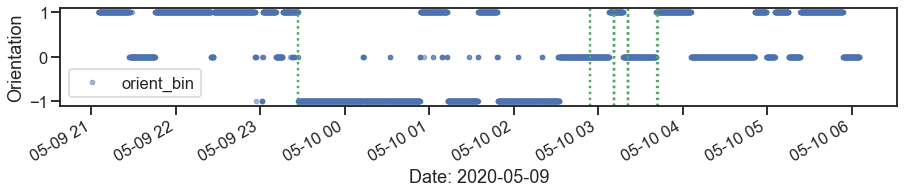

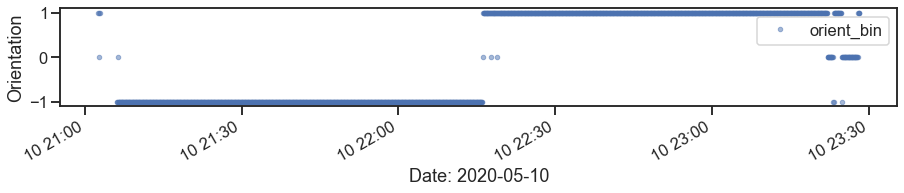

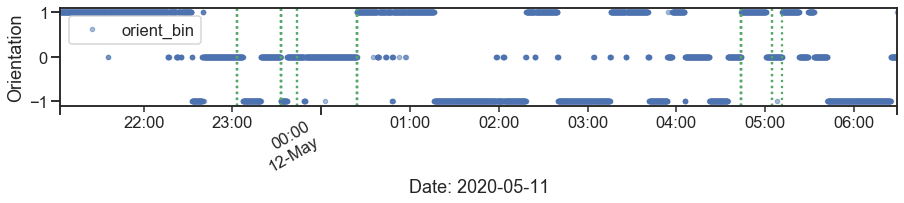

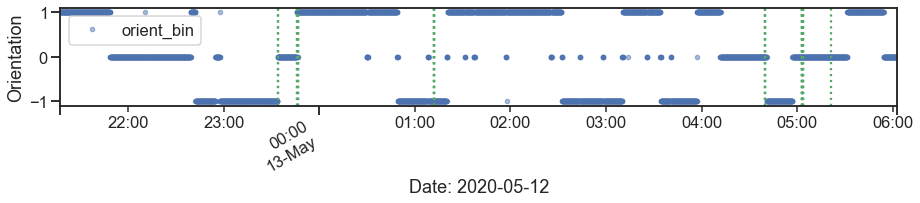

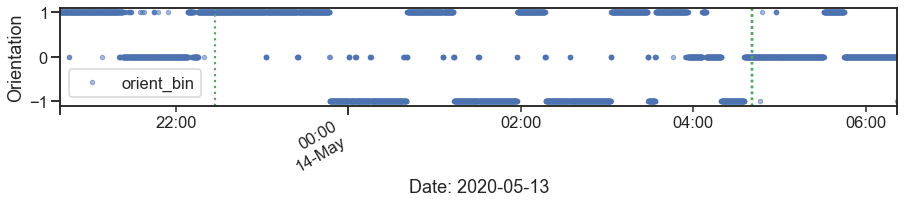

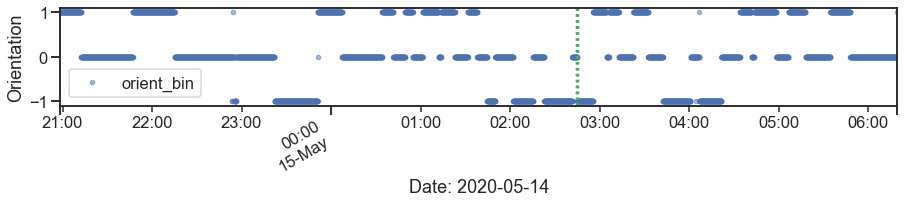

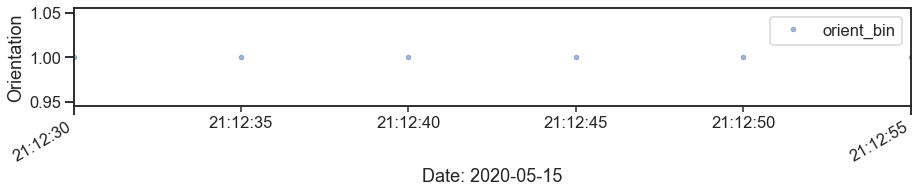

In [14]:
# Plot binned orientation and spo2 on same graph
for date in dates:
    date_df = df[(df["sleep_night"] == pd.Timestamp(date))]
    things = ["orient_bin"] # Weird behavior that if I don't have this line, all graphs are ploted together
    axes = date_df[things].plot(marker='.', alpha=0.5, linestyle="None", figsize=(15, 2), subplots=True)
    axes[0].set_ylabel("Orientation")
    axes[0].set_xlabel("Date: {}".format(date.date()))
    low_oxy = date_df[date_df["low_oxygen"] == 1].index
    for xc in low_oxy:
        axes[0].axvline(x=xc, color='g', linestyle=':')

In [15]:
df.groupby(["low_oxygen", "orient_bin"]).size()

low_oxygen  orient_bin
0           -1            28612
             0            29421
             1            42528
1           -1               43
             0              115
             1              108
dtype: int64

In [18]:
# Back sleeping for 50% of time NOT in low oxygen state (defined at > 88% SpO2): Now 30%!
# 0: back, -1: right, 1: left
df["orient_bin"].loc[(df["low_oxygen"] == 0)].value_counts(normalize=True)

 1    0.422907
 0    0.292569
-1    0.284524
Name: orient_bin, dtype: float64

In [19]:
# Back sleeping for 66% of time IN low oxygen state (defined as <= 88% SpO2): Now 43%!
# 0: back, -1: right, 1: left
df["orient_bin"].loc[(df["low_oxygen"] == 1)].value_counts(normalize=True)

 0    0.432331
 1    0.406015
-1    0.161654
Name: orient_bin, dtype: float64

Text(0.5, 1.0, 'Dist of low oxygen events per night')

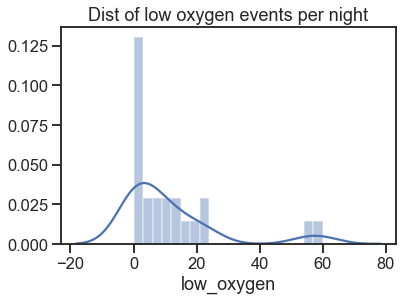

In [20]:
# Number of low oxygen events per night
num_by_sleep_night = df.groupby("sleep_night").sum()

ax = sns.distplot(num_by_sleep_night["low_oxygen"].dropna(), bins=20, norm_hist=False)
ax.set_title("Dist of low oxygen events per night")

(113, 11)


Text(0.5, 0, 'Number of low oxygen events')

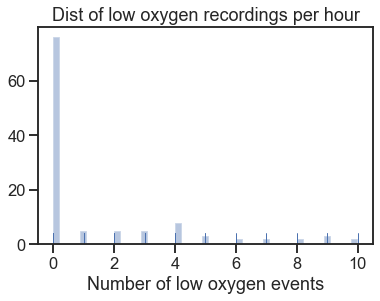

In [22]:
df_comp_hour = df[df["complete_hour"] == 1]

df_low = df_comp_hour.groupby([df_comp_hour.index.date, df_comp_hour.index.hour]).sum()
print(df_low.shape)
ax = sns.distplot(df_low['low_oxygen'], bins=45, kde=False, rug=True)
ax.set_title("Dist of low oxygen recordings per hour")
ax.set_xlabel("Number of low oxygen events")

Text(0.5, 0, 'Number of low oxygen events (Only nights >= 5 hours)')

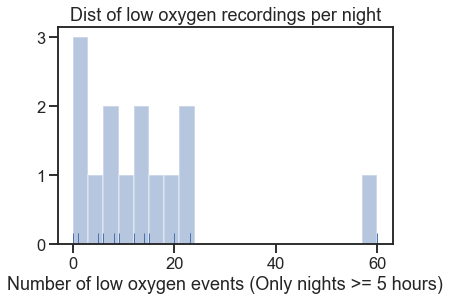

In [23]:
df_night = df[df["complete_night"] == 1]
df_night_to_plot = df_night.groupby("sleep_night")["low_oxygen"].sum()

ax = sns.distplot(df_night_to_plot, bins=20, kde=False, rug=True)
ax.set_title("Dist of low oxygen recordings per night")
ax.set_xlabel("Number of low oxygen events (Only nights >= 5 hours)")

Text(0.5, 1.0, 'Number low oxygen events by date')

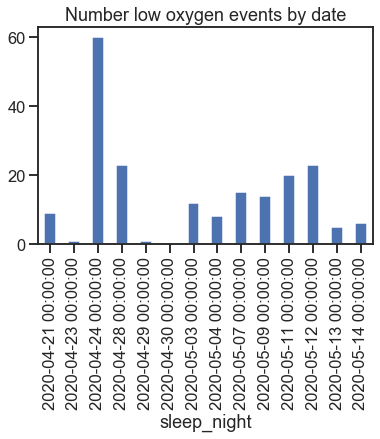

In [24]:
ax = df_night_to_plot.plot.bar()
ax.set_title("Number low oxygen events by date")

Text(0.5, 1, 'Number low oxygen events by day of the week')

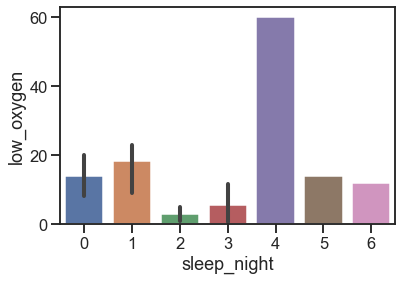

In [25]:
sns.barplot(x=df_night_to_plot.index.dayofweek, y=df_night_to_plot)
ax.set_title("Number low oxygen events by day of the week")
# Monday=0, Sunday=6

In [28]:
df['orient_bin'] = df['orient_bin'].astype(int)
df_classifier = df.resample('1Min').agg(['max', 'min', 'mean']).dropna()
df_classifier.shape

(8428, 33)

In [29]:
df_classifier.columns = ['_'.join(col).strip() for col in df_classifier.columns.values]
df_classifier.head()

,Orientation_max,Orientation_min,Orientation_mean,Inclination_max,Inclination_min,Inclination_mean,SpO2(%)_max,SpO2(%)_min,SpO2(%)_mean,Pulse Rate(bpm)_max,...,low_oxygen_mean,hour_max,hour_min,hour_mean,complete_hour_max,complete_hour_min,complete_hour_mean,complete_night_max,complete_night_min,complete_night_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2020-04-21 20:58:00,-82.30,-82.30,-82.300000,68.07,68.07,68.070000,96.0,96.0,96.000000,66.0,...,0.0,20.0,20.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0
2020-04-21 20:59:00,-74.35,-82.46,-79.333333,71.69,68.04,69.678333,96.0,94.0,95.666667,70.0,...,0.0,20.0,20.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0
2020-04-21 21:00:00,-76.91,-79.71,-78.035000,72.01,67.56,69.739167,97.0,96.0,96.083333,68.0,...,0.0,21.0,21.0,21.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-04-21 21:01:00,-76.84,-78.45,-77.607500,69.21,68.72,68.950833,96.0,96.0,96.000000,68.0,...,0.0,21.0,21.0,21.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-04-21 21:02:00,-74.64,-95.48,-81.259167,71.23,64.00,67.485833,97.0,96.0,96.083333,70.0,...,0.0,21.0,21.0,21.0,1.0,1.0,1.0,1.0,1.0,1.0


In [30]:
print(df_classifier.describe())

       Orientation_max  Orientation_min  Orientation_mean  Inclination_max  \
count      8428.000000      8428.000000       8428.000000      8428.000000   
mean        -10.590191       -20.568897        -15.727916        94.399796   
std          74.091186        73.537016         72.705861        18.184437   
min        -136.500000      -179.630000       -136.604167        48.400000   
25%         -75.450000       -83.372500        -78.651042        78.862500   
50%          -9.195000       -20.110000        -15.412917        97.610000   
75%          69.660000        61.152500         63.642292       107.390000   
max         179.510000       174.930000        175.446667       178.910000   

       Inclination_min  Inclination_mean  SpO2(%)_max  SpO2(%)_min  \
count      8428.000000       8428.000000  8428.000000  8428.000000   
mean         90.274215         92.341241    96.717252    94.880043   
std          17.151133         17.029974     1.459928     1.954378   
min          46.4

In [31]:
result = df_classifier.groupby('orient_bin_min')['low_oxygen_max'].mean()
print("Probability of a low oxygen event per minute, by position (-1: right, 0: back, 1: left)")
print(result)

Probability of a low oxygen event per minute, by position (-1: right, 0: back, 1: left)
orient_bin_min
-1.0    0.006661
 0.0    0.018424
 1.0    0.006617
Name: low_oxygen_max, dtype: float64


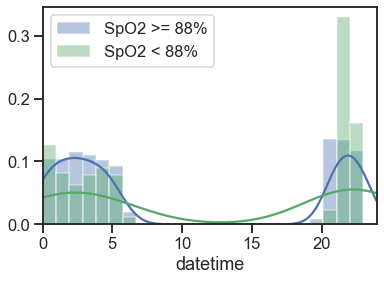

In [33]:
# Low oxygen events tend to occur slightly later in the night

# Time since start of position
# Time of night
fig, ax = plt.subplots()
sns.distplot(df[df["low_oxygen"] == 0].index.hour,
                  ax=ax, bins=24, label="SpO2 >= 88%")
sns.distplot(df[df["low_oxygen"] == 1].index.hour,
            ax=ax, label="SpO2 < 88%", bins=24, color='g')
ax.set_xlim([0, 24])
ax.legend()

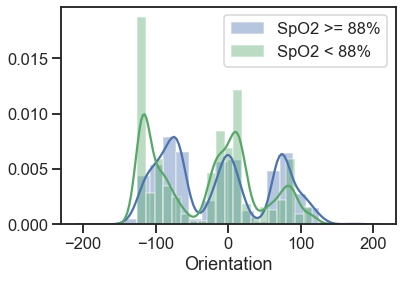

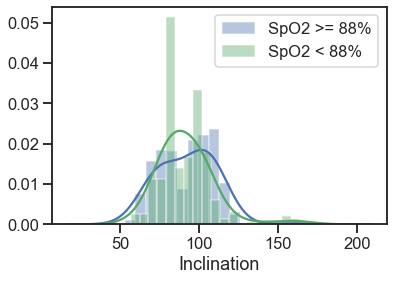

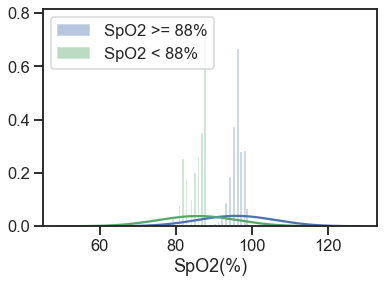

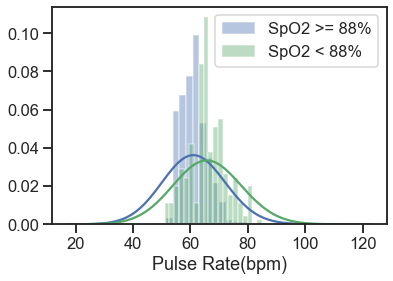

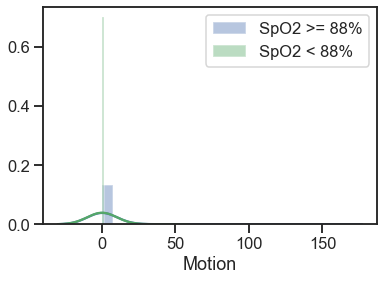

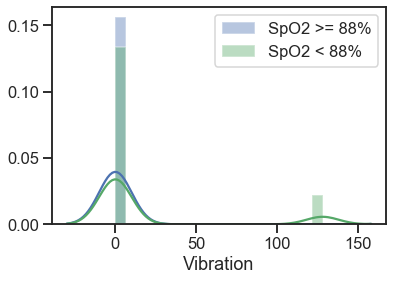

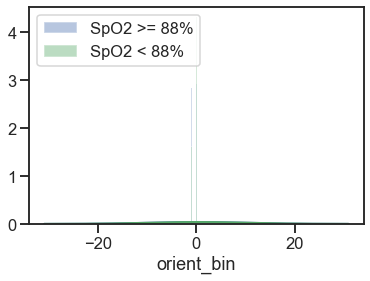

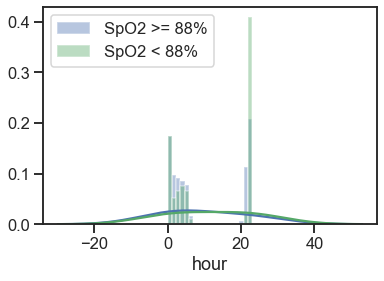

In [37]:
# See if any of the other features differ in the low oxygen states
# Looks like heart rate tends to be higher, which is interesting

for col in df.columns:
    if col in ["sleep_night", "hour_floor", "low_oxygen", "Orient_bin", "complete_hour", "complete_night"]:
        continue
    fig, ax = plt.subplots()
    sns.distplot(df[col].loc[df["low_oxygen"] == 0],
                      ax=ax, bins=20, label="SpO2 >= 88%", kde_kws={'bw': 10.0})
    sns.distplot(df[col].loc[df["low_oxygen"] == 1],
                ax=ax, label="SpO2 < 88%", bins=20, color='g', kde_kws={'bw': 10.0})
    ax.legend()

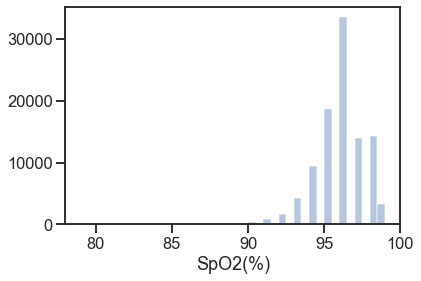

In [43]:
sns.distplot(df["SpO2(%)"], kde=False, bins=40)